In [36]:
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
import seaborn as sns

In [37]:
path =  os.path.normpath(os.getcwd() + os.sep + os.pardir)
path.replace('/','\\')
path += '\\'

file = [
        'Emotion_final_CK_plus_XYZ_NORMAL.csv',
        'Emotion_final_CK_plus_XXX_NORMAL.csv',
        'Emotion_final_CK_plus_SPH_NORMAL.csv',
        'Emotion_final_CK_plus_SPH_NORMAL_XXX.csv',
        'Emotion_final_CK_plus_ANGLE.csv']

In [38]:
OUTPUT_CLASSES = {'sadness':0, 'anger':1,'contempt':2,'disgust':3,'fear':4,'happiness':5,'neutral':6,'surprised':7}

In [39]:
file_name = file[3][:-4]
file_name

'Emotion_final_CK_plus_SPH_NORMAL_XXX'

In [40]:

path = path+file[3]
path

'd:\\majorProjectV2\\Emotion_final_CK_plus_SPH_NORMAL_XXX.csv'

In [41]:
df = pd.read_csv(path)
df = df.drop(['Image_name'], axis = 1)
df = df.drop(['Unnamed: 0'], axis = 1)
for i in range(1,10):
    df = df.sample(frac=1).reset_index(drop=True)
df.tail(15)


,0,1,2,3,4,5,6,7,8,9,...,195,196,197,198,199,200,201,202,203,Emotion
905,-2.073102,-1.928533,-1.800027,-1.655458,-1.526952,-1.253877,-0.916549,-0.514968,0.095435,0.705837,...,0.270981,0.052879,0.368842,0.422489,0.386120,0.081395,0.414419,0.426535,0.395715,6
906,-2.021850,-1.950317,-1.807252,-1.735719,-1.664187,-1.378056,-1.020393,-0.662729,-0.018935,0.553326,...,0.331652,0.123619,0.448127,0.503588,0.462818,0.140015,0.444404,0.456251,0.427687,6
907,-2.056123,-1.909684,-1.844600,-1.763246,-1.633078,-1.340201,-1.047323,-0.624278,0.010289,0.661127,...,0.104479,-0.117840,0.382404,0.443532,0.381246,-0.155466,0.243110,0.283036,0.244158,5
908,-2.013544,-1.943971,-1.804823,-1.735250,-1.596102,-1.317808,-1.039513,-0.691644,-0.082875,0.473715,...,0.465400,0.205103,0.601710,0.669209,0.633049,0.271905,0.604342,0.615940,0.572349,6
909,-2.148917,-2.148917,-2.010801,-1.941743,-1.803628,-1.510132,-1.147578,-0.715967,-0.077182,0.561603,...,0.379920,0.194383,0.494440,0.535535,0.475698,0.102117,0.419921,0.447120,0.437908,6
910,-2.001655,-1.933895,-1.781435,-1.645916,-1.442636,-1.171597,-0.883618,-0.477059,0.081959,0.708738,...,0.494224,0.296529,0.611215,0.662898,0.615021,0.283344,0.583011,0.598411,0.575173,6
911,-1.850086,-1.850086,-1.712837,-1.644212,-1.506963,-1.301090,-0.957968,-0.546221,0.002775,0.620396,...,0.340358,0.076901,0.507543,0.580228,0.543649,0.166906,0.496800,0.510057,0.461155,6
912,-1.944411,-1.873318,-1.731131,-1.588943,-1.446756,-1.247694,-0.963319,-0.607851,-0.053320,0.586523,...,0.435419,0.225871,0.563857,0.605146,0.550576,0.164114,0.536146,0.561519,0.546644,6
913,-1.892341,-1.824185,-1.756029,-1.687872,-1.602677,-1.330051,-1.040387,-0.682566,-0.103237,0.544249,...,0.313788,0.114707,0.470944,0.528548,0.482452,0.125697,0.430208,0.445560,0.414488,6
914,-2.138484,-2.138484,-1.997758,-1.935213,-1.731942,-1.466126,-1.059584,-0.653042,0.019315,0.566583,...,0.543555,0.353735,0.660062,0.695497,0.626184,0.222413,0.578972,0.611619,0.612118,6


In [42]:
X = df.drop('Emotion',axis=1)
y = df.Emotion

In [43]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [44]:
#Linear SVM
from sklearn.svm import SVC 
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train) 
svm_predictions = svm_model_linear.predict(X_test) 
  
# model accuracy for X_test   
accuracy = svm_model_linear.score(X_test, y_test) 
print(accuracy)
print(confusion_matrix(y_test, svm_predictions))
print(classification_report(y_test,svm_predictions))


0.822463768115942
[[  0   0   0   0   0   0   8   0]
 [  0   0   0   0   0   0  12   0]
 [  0   0   0   0   0   0   5   0]
 [  0   1   0   7   1   0  15   0]
 [  0   0   0   0   4   0   2   0]
 [  0   0   0   0   3  15   1   0]
 [  0   0   0   0   0   0 184   0]
 [  0   0   0   0   0   0   1  17]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.00      0.00      0.00        12
           2       0.00      0.00      0.00         5
           3       1.00      0.29      0.45        24
           4       0.50      0.67      0.57         6
           5       1.00      0.79      0.88        19
           6       0.81      1.00      0.89       184
           7       1.00      0.94      0.97        18

    accuracy                           0.82       276
   macro avg       0.54      0.46      0.47       276
weighted avg       0.77      0.82      0.77       276



In [45]:
scores = cross_val_score(svm_model_linear,X_train, y_train,cv=5)
scores.mean()

0.8261022286821706

In [46]:
#SVM with grid search
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
param_grid = {'C':[10,100,1000,10000,100000,1000000],'gamma':[1,0.1,0.01,0.001,0.0001,0.00001,0.000001,0.0000001,0.00000001,0.000000001,0.0000000001], 'kernel':['rbf']}
grid = GridSearchCV(SVC(),param_grid,refit = True, verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 66 candidates, totalling 330 fits
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.1s
[CV] C=10, gamma=1, kernel=rbf .......................................
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.1s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.1s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.1s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.1s
[CV] C=10, gamma=0.1, kernel=rbf ..................................

GridSearchCV(estimator=SVC(),
             param_grid={'C': [10, 100, 1000, 10000, 100000, 1000000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06,
                                   1e-07, 1e-08, 1e-09, 1e-10],
                         'kernel': ['rbf']},
             verbose=2)

In [47]:
grid.best_params_

{'C': 10000, 'gamma': 0.001, 'kernel': 'rbf'}

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.56      0.42      0.48        12
           2       0.67      0.40      0.50         5
           3       0.94      0.62      0.75        24
           4       0.62      0.83      0.71         6
           5       1.00      0.79      0.88        19
           6       0.89      0.98      0.93       184
           7       1.00      0.94      0.97        18

    accuracy                           0.87       276
   macro avg       0.71      0.62      0.65       276
weighted avg       0.86      0.87      0.86       276



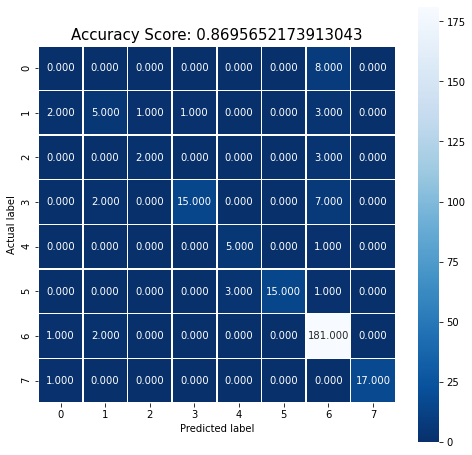

In [48]:
predic = grid.predict(X_test)
print(classification_report(y_test,predic))

cm = confusion_matrix(y_test, predic)
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
score = grid.score(X_test,y_test)
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [49]:
import pickle
import time
NAME = "Emotion_Detection-SVM-GRIDSEARCH-64x2-{}-{}".format(file_name,int(time.time()))
pickle.dump(grid, open(NAME, 'wb'))


In [50]:
scores = cross_val_score(grid,X_train, y_train,cv=5)
scores.mean()

Fitting 5 folds for each of 66 candidates, totalling 330 fits
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.1s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.1s
[CV] C=10, gamma=1, kernel=rbf .......................................
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.1s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.1s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.1s
[CV] C=10, gamma=0.1, kernel=rbf ..................................

0.8602592054263566